# Continuous Control

---

## Preamble

### The project

In this notebook, a DQN agent is used to solve a navigation problem as a first project for the  [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

Before using this notebook check that you have followed the .Readme file available in [GitHub Project repository](https://github.com/BDGITAI/RL_P1_Navigation/)

For the Notebook to work you will need the Banana environment executable which was placed in [GitHub Project repository](https://github.com/BDGITAI/RL_P1_Navigation/Banana_Windows_x86_64/). The environment needs to uncompressed in  `"../Banana_Windows_x86_64/Banana.exe"`

This DQN implementation uses the Pytorch library and was tested in a **Windows 64 bits** platform using **CPU**  computation. 


This notebook is divided in two parts
* **Part 1** : Training. We will train an Agent and see how the learning can be applied to execute a task
* **Part 2** : To see an already trained agent you can skip to Part 2 and load a trained agent.

### Base used for the project

here describe shangtong

---

## 1. Part 1 : Training an agent 

### 1.1 Imports and initialisation function
Import the deep_rl libraries from Shangtong and create a function creating the DDPG agent interacting with the Unity environment

In [1]:
from deep_rl import *
import sys

# Init function used to create DDPG agent and initialise its configugration
def ddpg_low_dim_state_unity():
    config = Config()
    log_dir = get_default_log_dir(ddpg_low_dim_state_unity.__name__)
    config.task_fn = lambda **kwargs: ContinuousControl(config.eval_env,log_dir=log_dir)
    config.eval_env = Unity()
    config.max_steps = int(1e6)
    config.eval_interval = int(1e4)
    config.eval_episodes = 20

    config.network_fn = lambda: DeterministicActorCriticNet(
        config.state_dim, config.action_dim,
        actor_body=FCBody(config.state_dim, (400, 300), gate=F.tanh),
        critic_body=TwoLayerFCBodyWithAction(
            config.state_dim, config.action_dim, (400, 300), gate=F.tanh),
        actor_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-4),
        critic_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-3))

    config.replay_fn = lambda: Replay(memory_size=int(1e7), batch_size=64)
    config.discount = 0.99
    config.random_process_fn = lambda: OrnsteinUhlenbeckProcess(
        size=(config.action_dim, ), std=LinearSchedule(0.2))
    config.min_memory_size = 64
    config.target_network_mix = 1e-3
    #config.logger = get_logger()
    return DDPGAgent(config)

### 1.2 Training loop


In [2]:
##TODO test with comment line
def train(agent,n_episodes=2000, max_t=1000, score_target =30.0):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        # reset environment at the start of each episode
        state = agent.config.eval_env.reset()
        # episode is not finished
        done = False
        # no reward at start
        episode_rewards = 0
        score = 0
        for t in range(max_t):
            # decide wich action to take according to eps greedy policy
            #action = agent.eval_step(state)
            # execute the action in the environment (interface with unity)
            #next_state, reward, done, info = agent.config.eval_env.step(action)
            # store this experience in the memory and learn if enough experiences have been gathered
            agent.step()
            # update current state as next state
            #state = next_state
            # cumul rewrd
            score = agent.episode_reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}\tMax Score: {:.2f}'.format(i_episode, np.mean(scores_window),np.max(scores_window)), end="")
        # save network weigth every 100 episodes
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            path = 'checkpoint_'+str(i_episode)+'.pth'
            agent.save(path)
            # save score
            f = open('output.txt', 'w')
            f.write('score: '+ str(scores)+'\n')
            f.close()
        # target is 30 to win. 
        if np.mean(scores_window)>=score_target:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            path = 'checkpoint_'+str(i_episode)+'.pth'
            agent.save(path)
            break
    return scores



### 1.3 Execute training loop 

In [6]:
mkdir('data/video')
mkdir('dataset')
mkdir('log')

set_one_thread()
select_device(-1)
agent = ddpg_low_dim_state_unity()
scores = train(agent)
agent.config.eval_env.close()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 3.07	Max Score: 8.60
Episode 200	Average Score: 6.08	Max Score: 12.12
Episode 300	Average Score: 7.60	Max Score: 15.24
Episode 400	Average Score: 8.43	Max Score: 14.20
Episode 500	Average Score: 9.60	Max Score: 14.88
Episode 600	Average Score: 11.43	Max Score: 16.54
Episode 700	Average Score: 11.96	Max Score: 19.32
Episode 800	Average Score: 12.52	Max Score: 16.75
Episode 900	Average Score: 13.61	Max Score: 17.65
Episode 1000	Average Score: 13.37	Max Score: 18.47
Episode 1100	Average Score: 14.81	Max Score: 19.71
Episode 1200	Average Score: 14.75	Max Score: 17.97
Episode 1300	Average Score: 15.58	Max Score: 19.17
Episode 1400	Average Score: 15.37	Max Score: 19.31
Episode 1500	Average Score: 15.68	Max Score: 18.89
Episode 1600	Average Score: 15.73	Max Score: 18.83
Episode 1700	Average Score: 16.40	Max Score: 19.02
Episode 1800	Average Score: 16.41	Max Score: 18.99
Episode 1900	Average Score: 16.59	Max Score: 19.72
Episode 2000	Average Score: 17.38	Max Score: 1

In [5]:

agent = ddpg_low_dim_state_unity()
agent.load('checkpoint_2000.pth')
scores_2_phase = train(agent, n_episodes=2000, max_t=500, score_target =16.0)
agent.config.eval_env.close()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 1.64	Max Score: 7.81
Episode 200	Average Score: 5.22	Max Score: 10.20
Episode 300	Average Score: 10.50	Max Score: 17.12
Episode 400	Average Score: 15.28	Max Score: 19.53
Episode 425	Average Score: 16.05	Max Score: 19.53
Environment solved in 325 episodes!	Average Score: 16.05


### 1.4 Plot the training results

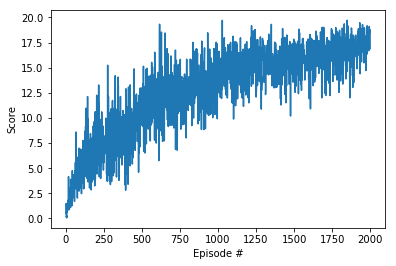

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
agent.config.eval_env.close()

agent.close()

## 2. Part 2 : Watch a trained agent

In [2]:

num_agents =1
agent = ddpg_low_dim_state_unity()
agent.load('checkpoint_425.pth')
brain_name = agent.config.eval_env.env.brain_names[0]
env_info = agent.config.eval_env.env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations[0]
score = 0                         # initialize the score (for each agent)
while True:
    action = agent.eval_step(state)
    # execute the action in the environment (interface with unity)
    next_state, reward, done, info = agent.config.eval_env.step(action)
    # update current state as next state
    state = next_state
    # cumul rewrd
    score += reward
    if done:                                  # exit loop if episode finished
        break
print('Total score this episode: {}'.format(score))
agent.config.eval_env.close()
agent.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score this episode: 32.09999928250909


## 3. Part 3 : Evaluate a trained agent

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Results 	Average Score: 33.13	Max Score: 39.58\Min Score: 1.06

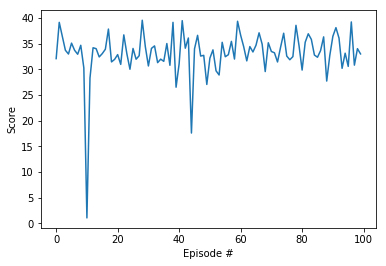

In [3]:
import matplotlib.pyplot as plt

def eval(agent,n_episodes=100):
    num_agents =1
    brain_name = agent.config.eval_env.env.brain_names[0]
    env_info = agent.config.eval_env.env.reset(train_mode=False)[brain_name] 
    state = env_info.vector_observations[0]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        score = 0
        while True:
            action = agent.eval_step(state)
            # execute the action in the environment (interface with unity)
            next_state, reward, done, info = agent.config.eval_env.step(action)
            # update current state as next state
            state = next_state
            # cumul rewrd
            score += reward
            if done:                      # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}\tMax Score: {:.2f}'.format(i_episode, np.mean(scores_window),np.max(scores_window)), end="")
    return scores

agent = ddpg_low_dim_state_unity()
agent.load('checkpoint_425.pth')  
scores = eval(agent)
f = open('eval.txt', 'w')
f.write('score: '+ str(scores)+'\n')
f.close()

print('\rResults \tAverage Score: {:.2f}\tMax Score: {:.2f}\tMin Score: {:.2f}'.format(np.mean(scores),np.max(scores),np.min(scores)), end="")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

agent.config.eval_env.close()